# Udacity Data Analyst Nanodegree
## Project 5 - We Rate Dogs

### Project Overview
This project consists mainly in developing our Data Wrangling techniques, which involves the following steps:
- Gathering data: There are three data structures that we need to deal in order to better understand the scenario, and we need to gather these data properly.
- Assessing data: Here we need to assess all the data that we have at our dispousal, in order to identify eight quality issues and two tidiness issues, at minimum.
- Cleaning data: For all the issues that we have identified previously in the data, we need to draw a solution and also execute the solution, in order to get a master dataset.

#### Other things to consider:
For this project, after cleaning the data, we need to store, analyze and visualize the data in order to get some insights.
Also, we need to draw some conclusions based on the insights that we may have had.



## Data Wrangling

### Gather data

In [161]:
# Importing the libraries that will be used in this project:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
from bs4 import BeautifulSoup

# set the option to display the full string from a pandas DataFrame
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

In [ ]:
# This code bellow was provided for us in order to get data from twitter using its API named tweepy:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [162]:
# Reading the file named: twitter-archive-enhanced.csv that was provided for us in the instructions.
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [163]:
# Looking to the df to see if it was read properly.
# DF 1/3
archive_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


In [164]:
# Handle the file tweet-json.txt in order to read it, line by line, and store it as a pandas DF
# read file contents
tweet_data = []

with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        tweet_data.append(json.loads(line))

#convert to pandas dataframe
tweet_data = pd.DataFrame(tweet_data)

In [165]:
# Looking to the data in order to understand its structure
tweet_data.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN


In [166]:
# Getting only the columns with information that is relevant for our project
tweet_df = tweet_data[['id', 'favorite_count', 'retweet_count']]

In [167]:
# Looking to the df to see if it was read properly.
# DF 2/3
tweet_df.head(1)

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853


In [168]:
# Reading the image prediction file.
# url to read the file named: image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

In [169]:
# Openning a file to write the content associated with the url
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [170]:
# As it is a tsv, we read it with the \t separator.
image_predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [171]:
# Looking to the df to see if it was read properly.
# DF 3/3
image_predictions_df.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


### Assessing data

Here, we have three DFs:
- archive_df
- tweet_df
- image_predictions_df

I will assess each data frame using both, visual and programmatically approaches.

In [172]:
#First, I'll assess the archive_df data visually
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [173]:
#Analyzing the archive_df programmatically
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [174]:
# Inspecting the rating_denominator and rating_numerator
archive_df[['rating_denominator', 'rating_numerator']].describe()

,rating_denominator,rating_numerator
count,2356.000000,2356.000000
mean,10.455433,13.126486
std,6.745237,45.876648
min,0.000000,0.000000
25%,10.000000,10.000000
50%,10.000000,11.000000
75%,10.000000,12.000000
max,170.000000,1776.000000


In [175]:
archive_df.rating_denominator.value_counts().sort_index(ascending=False)


170    1   
150    1   
130    1   
120    1   
110    1   
90     1   
80     2   
70     1   
50     3   
40     1   
20     2   
16     1   
15     1   
11     3   
10     2333
7      1   
2      1   
0      1   
Name: rating_denominator, dtype: int64

In [176]:
sum(archive_df.rating_denominator != 10)

23

In [177]:
archive_df.rating_numerator.value_counts().sort_index(ascending=False)


1776    1  
960     1  
666     1  
420     2  
204     1  
182     1  
165     1  
144     1  
143     1  
121     1  
99      1  
88      1  
84      1  
80      1  
75      2  
60      1  
50      1  
45      1  
44      1  
27      1  
26      1  
24      1  
20      1  
17      1  
15      2  
14      54 
13      351
12      558
11      464
10      461
9       158
8       102
7       55 
6       32 
5       37 
4       17 
3       19 
2       9  
1       9  
0       2  
Name: rating_numerator, dtype: int64

In [178]:
sum(archive_df.rating_numerator >= 20)

25

In [179]:
archive_df[archive_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


#### Archive_df issues:
Some issues, classified as quality or tideness issues:

##### Quality:
- **1** - tweet_id is not a string
- **2** - timestamp is not a datetime datatype
- **3** - name has a lot of NULL values and values that are wrongly assigned
- **4** - NULL values in expanded_urls
- **5** - the two 'in_reply...' columns have several rows with NULL values
- **6** - the three 'retweeted...' columns have several NULL values
- **7** - the source column is hard to understand
- **8** - There are 23 rating_denominators that are different than 10, and as the number of tweets that have this issue is really small, I will fix it.
- **9** - There are only 23 tweets that have the numerator greater than 20, and to maintain the rating aspect of the page interesting without loosing its quality, I will fix the ones that have more than 20 in the numerator.
- **10** - There are 6 rows where the rating_numerator is decimal and the extraction made was wrong, so I will fix it

##### Tidiness
- **1** - the last four columns should be one with the proper classification

In [180]:
#Analyzing tweet_df visually 
tweet_df

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [181]:
#Analyzing tweet_df programmatically
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [182]:
tweet_df.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


#### tweet_df issues:
Some issues to consider in the df, classified as quality of tideness issues:

##### Quality
- **11** - the id is not a string

##### Tidiness
- **2** - This dataframe should be in the same as the twitter-archive, better said, should be part of the `archive_df`.

In [183]:
#Analyzing the image_predictions_df visually
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [184]:
#Analysing the image_predictions_df programmatically
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### image_predictions_df issues
Some issues to consider in the df, classified as either, quality or tidiness issues.

##### Quality
- **12** - tweet_id not a string

##### Tideness
- **3** - The `jgp_url` and `p1`, which corresponds to the dog most likelly breed, should be part of the `archive_df`.

### key points in this project to follow:

All the information below was provided for us in the project's guidelines page at `Udacity`.


- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.


### Clean data

There are three DFs to clean:

- archive_df
- tweet_df
- image_predictions_df

The first step to clean them is to create a copy, so we can access both versions if some comparison is needed.

In [185]:
# Make copyies:
tweet_df_original = tweet_df.copy()
archive_df_original = archive_df.copy()
image_predictions_df_original = image_predictions_df.copy()

##### Clean `tweet_df`

##### Define


11. id is not a string.
   
Access the column and change the variable type from int to string.

##### Code

In [186]:
#Cleaning the tweet_df
# Cleanning the id column
tweet_df[['id']] = tweet_df[['id']].astype(str);

##### Test

In [187]:
#Testing the cleaning process
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [188]:
tweet_df.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


##### Clean `image_predictions_df`

##### Define

12. tweet_id is not a string:

Access the column and change the type from int to string using the .astype() method.

##### Code

In [189]:
#Cleaning the image_predictions_df
# Cleanning the tweet_id column
image_predictions_df[['tweet_id']] = image_predictions_df[['tweet_id']].astype(str)

##### Test

In [190]:
#testing the change
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [191]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


##### Clean `archive_df`

In [193]:
# Cleaning the archive_df
# As this DF is the one that has the most number of cleannings,
# I will visualize once more before begin.
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [194]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

##### Define

1. tweet_id is not a string
    
Access the column and change the type from int to string

##### Code

In [195]:
# Cleanning the tweet_id column
archive_df[['tweet_id']] = archive_df['tweet_id'].astype(str)

##### Test

In [196]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

##### Define

2. timestamp is not datetime datatype:

Access the column and change the type from string to datetime using `pandas.to_datetime()` method

##### Code

In [197]:
# Cleanning the timestamp column
archive_df[['timestamp']] = pd.to_datetime(archive_df['timestamp'])

##### Test

In [198]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64

##### Define

4. NULL values in expanded_urls:

Drop the whole column, since this variable in not needed in our future analyses.

##### Code

In [199]:
# Cleanning the NULL values in expanded urls.
archive_df.drop('expanded_urls', axis=1, inplace=True)

##### Test

In [200]:
'expanded_urls' in archive_df.columns

False

##### Define

5. The two in_reply... columns have several rows with NULL values.

Maintain only the rows where in_reply_to_status_id and in_reply_to_user_id are NAs, because we don't want replies in our analysis.

Drop the two columns.

##### Code

In [201]:
# Cleanning both in_reply... columns
archive_df = archive_df[archive_df.in_reply_to_status_id.isna()]

In [202]:
# Dropping the columns that are no longer needed
archive_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

##### Test

In [203]:
('in_reply_to_status_id' or 'in_reply_to_user_id') in archive_df.columns

False

##### Define

6. The three retweeted... columns have several NULL values:

Maintain only the rows where these columns are NAs.

Drop the columns

##### Code

In [204]:
# Cleanning the three retweeted columns
archive_df = archive_df[archive_df.retweeted_status_id.isna()]

In [205]:
# Dropping the columns that are no longer needed
archive_df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

##### Test

In [206]:
(('retweeted_status_id' or 'retweeted_status_user_id') or 'retweeted_status_timestamp') in archive_df.columns

False

##### Define

3. name has a lot of NULL values and values that are wrongly assigned

Visualize the names in order to see the 30 most used names, fix the ones that appears to be wrongly assigned.


##### Code

In [207]:
# Cleanning the names that are wrongly assigned in the name column from the archive_df
archive_df['name'].value_counts().head(30)

None       603
a          55 
Lucy       11 
Charlie    11 
Oliver     10 
Cooper     10 
Tucker     9  
Penny      9  
Lola       8  
the        8  
Winston    8  
Sadie      8  
Toby       7  
Daisy      7  
an         6  
Stanley    6  
Oscar      6  
Bailey     6  
Bo         6  
Koda       6  
Bella      6  
Jax        6  
Scout      5  
Louis      5  
Dave       5  
Buddy      5  
Milo       5  
Rusty      5  
Leo        5  
Bentley    5  
Name: name, dtype: int64

In [208]:
# Cleanning all the names that are wrongly assigned to `a`
archive_df.loc[archive_df['name'] == 'a', 'name'] = 'None'

In [209]:
# There are two more observed names to change that I could visually inspect:
# the, an
# Cleanning the names
archive_df.loc[archive_df['name'] == 'an', 'name'] = 'None'
archive_df.loc[archive_df['name'] == 'the', 'name'] = 'None'

##### Test

In [210]:
# Now, I will inspect once more:
archive_df.name.value_counts().head(50)

None        672
Lucy        11 
Charlie     11 
Cooper      10 
Oliver      10 
Tucker      9  
Penny       9  
Sadie       8  
Winston     8  
Lola        8  
Daisy       7  
Toby        7  
Stanley     6  
Bella       6  
Oscar       6  
Jax         6  
Bailey      6  
Bo          6  
Koda        6  
Rusty       5  
Milo        5  
Bentley     5  
Louis       5  
Scout       5  
Leo         5  
Buddy       5  
Dave        5  
Chester     5  
Chip        4  
Jack        4  
Gus         4  
Jeffrey     4  
Jerry       4  
Alfie       4  
Archie      4  
Sophie      4  
Clark       4  
Oakley      4  
Duke        4  
Brody       4  
Gary        4  
Scooter     4  
Dexter      4  
very        4  
Cassie      4  
Boomer      4  
Reggie      4  
George      4  
Phil        4  
Clarence    4  
Name: name, dtype: int64

##### Define

3. Part 2

As we saw, there is a pattern that every wrongly assigned name starts with lowercase letter, so we will fix this by getting all lowercase letter names and change them to the string None

##### Code

In [211]:
# As we could see, there are more names that have the pattern of begin with
# lowercase letter that are not valid names.
# So, I will now, clean these names properly.
names_mask = archive_df.name.str.contains('^[a-z]', regex = True)
archive_df[names_mask].name.value_counts().sort_index()

actually        2
all             1
by              1
getting         2
his             1
incredibly      1
infuriating     1
just            3
life            1
light           1
mad             1
my              1
not             2
officially      1
old             1
one             4
quite           3
space           1
such            1
this            1
unacceptable    1
very            4
Name: name, dtype: int64

In [212]:
archive_df.loc[names_mask, 'name'] = "None"

##### Test

In [213]:
#Testing the change:
archive_df[names_mask].name.value_counts().sort_index()

None    35
Name: name, dtype: int64

In [214]:
# Looking at the name's column once more:
archive_df.name.value_counts().head(50)

None        707
Charlie     11 
Lucy        11 
Cooper      10 
Oliver      10 
Tucker      9  
Penny       9  
Sadie       8  
Lola        8  
Winston     8  
Daisy       7  
Toby        7  
Bo          6  
Koda        6  
Bailey      6  
Bella       6  
Jax         6  
Oscar       6  
Stanley     6  
Scout       5  
Milo        5  
Dave        5  
Rusty       5  
Louis       5  
Chester     5  
Bentley     5  
Leo         5  
Buddy       5  
Maggie      4  
Derek       4  
Phil        4  
Gary        4  
Jerry       4  
Larry       4  
Scooter     4  
Finn        4  
Sophie      4  
Alfie       4  
Gus         4  
Cassie      4  
Clarence    4  
Brody       4  
Bear        4  
Jack        4  
Jeffrey     4  
Dexter      4  
George      4  
Clark       4  
Sammy       4  
Chip        4  
Name: name, dtype: int64

##### Define

7. The source column is hard to understand.

Extract only the string that is located between > and </a

##### Code

In [215]:
# Inspecting the source column
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     31  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [216]:
# Cleanning the source column:
archive_df['source'] = archive_df['source'].str.extract('^<a.+>(.+)</a>$')

##### Test

In [217]:
# Testing
archive_df.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

##### Define

8. Rating denominators that are different than 10.

Since that are few rating denominator that are different than 10, I will drop them, as their significance is reduced

##### Code

In [218]:
# Dropping the rows that have the rating_denominator values that are not equal 10
archive_df.rating_denominator.value_counts().sort_index(ascending=False)


170    1   
150    1   
120    1   
110    1   
90     1   
80     2   
70     1   
50     3   
40     1   
20     1   
11     2   
10     2080
7      1   
2      1   
Name: rating_denominator, dtype: int64

In [219]:
archive_df = archive_df[archive_df.rating_denominator == 10]

##### Test

In [220]:
# Testing 
archive_df.rating_denominator.value_counts().sort_index(ascending=False)


10    2080
Name: rating_denominator, dtype: int64

##### Define

9. Rating numerators greater than 20

Since I've stablished the upper bound to be 20 dor the numerator, and there are just a few rows with are outise of this boundary, I will drop them.

##### Code

In [221]:
# numerators greater than 20
mask = archive_df.rating_numerator > 20
archive_df[mask].rating_numerator.value_counts().sort_index(ascending=False)


1776    1
420     1
75      1
27      1
26      1
Name: rating_numerator, dtype: int64

In [222]:
# Dropping them
archive_df = archive_df[archive_df.rating_numerator <= 20]

##### Test

In [223]:
# Testing
archive_df.rating_numerator.value_counts().sort_index(ascending=False)


14    38 
13    287
12    486
11    413
10    436
9     152
8     98 
7     51 
6     32 
5     34 
4     15 
3     19 
2     9  
1     4  
0     1  
Name: rating_numerator, dtype: int64

##### Define

10. Rating numerators that are in decinal form

After the previous cleanning, there are only one numerator that are in decinal form and was assigned wrongly in the wrangle process, so the best form to deal with this observation is to round it from 13.5 to 14, just because these dogs are amazing and deserve the rounding grade!

##### Code

In [224]:
# decimal rating_numerator
archive_df[archive_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id','text', 'rating_numerator']]


,tweet_id,text,rating_numerator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5


In [225]:
# Dealing with the issue
mask = archive_df.text.str.contains(r"(\d+\.\d*\/\d+)")

archive_df.loc[mask, 'rating_numerator'] = 14

##### Test

In [226]:
archive_df.rating_numerator.value_counts().sort_index(ascending=False)


14    39 
13    287
12    486
11    413
10    436
9     152
8     98 
7     51 
6     32 
5     33 
4     15 
3     19 
2     9  
1     4  
0     1  
Name: rating_numerator, dtype: int64

In [227]:
archive_df[archive_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id','text', 'rating_numerator']]


,tweet_id,text,rating_numerator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",14


#### Tidiness issue in te archive_df

As highlighted above, we have four columns in the DF that represents a classification, so, as such, they would form only one column.


##### Define

1. Tidiness issue: The columns for dog stages should be onle column with the proper classification.

To address this issue, I will do as follows:

    1- Create a dummy variable containing 0s and 1s depending on the value of each variable.

    2- Apply this function on every one of the four variables that are considered issues in this scenario.

    3- Create a temporary column, called `none`, in order to hold the value when all other columns are zero.

    4- Create a column called `stage` that will be filled with either 0s or 1s depending on the value of the variables in question.

##### Code

In [228]:
# replace the stage name with 1, and 'None' with 0, like a dummy variable
make_dummy = lambda x: 0 if x == 'None' else 1

archive_df.doggo = archive_df.doggo.apply(make_dummy)
archive_df.floofer = archive_df.floofer.apply(make_dummy)
archive_df.pupper = archive_df.pupper.apply(make_dummy)
archive_df.puppo = archive_df.puppo.apply(make_dummy)

# by adding the stage columns, we can see how many are 'none' and how many stages are set
archive_df['none'] = archive_df['doggo'] + archive_df['floofer'] + \
                        archive_df['pupper'] + archive_df['puppo']

In [229]:
# Just to visualize the change in the archive_df
archive_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,none
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,0,0,0,0,0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,0,0,0,0,0
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,0,0,0,0,0
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,0,0,0,0,0
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,0,0,0,0,0


In [230]:
archive_df[['doggo', 'floofer', 'pupper', 'puppo', 'none']].nunique()

doggo      2
floofer    2
pupper     2
puppo      2
none       3
dtype: int64

In [231]:
archive_df.none.value_counts()

0    1740
1    324 
2    11  
Name: none, dtype: int64

##### Note:
Looks like we have 11 rows that have 2 dog stages defined, and this seems to be some kind of multiple-dog tweet.

As we only have 11 entries, I'll ignore and drop the second classificatios in this category, and I will only select the dog stage that appears in increasing count order, which is: floofer, puppo, doggo and pupper.

In [232]:
# if there are NO stages specified then set 'None' to 1
stage_none = lambda x: 1 if x == 0 else 0

# reset values in 'none' 
archive_df['none'] = archive_df['none'].apply(stage_none)

In [233]:
# Visualize the change:
archive_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,none
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,0,0,0,0,1
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,0,0,0,0,1
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,0,0,0,0,1
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,0,0,0,0,1
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,0,0,0,0,1


In [234]:
archive_df.none.value_counts()

1    1740
0    335 
Name: none, dtype: int64

In [235]:
archive_df.doggo.value_counts()

0    1992
1    83  
Name: doggo, dtype: int64

In [236]:
archive_df.floofer.value_counts()

0    2065
1    10  
Name: floofer, dtype: int64

In [237]:
archive_df.puppo.value_counts()

0    2051
1    24  
Name: puppo, dtype: int64

In [238]:
archive_df.pupper.value_counts()

0    1846
1    229 
Name: pupper, dtype: int64

In [239]:
# Order the stages in increasing count order: floofer, puppo, doggo and pupper
# set the choice order for dog stage based on count order
stage = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

# set the conditions for selecting the dog stage based on count order
conditions = [
    (archive_df[stage[0]] == 1),
    (archive_df[stage[1]] == 1),
    (archive_df[stage[2]] == 1),
    (archive_df[stage[3]] == 1),
    (archive_df[stage[4]] == 1)]


In [240]:
# Checking the conditions for 'floofer'
conditions[0].value_counts()

False    2065
True     10  
Name: floofer, dtype: int64

In [241]:
# select the dog stage based on the first successful condition; stage[4] is 'None'
archive_df['stage'] = np.select(conditions, stage, default = stage[4])

In [242]:
# Checking
archive_df.head(50)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,none,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,0,0,0,0,1,none
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,0,0,0,0,1,none
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,0,0,0,0,1,none
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,0,0,0,0,1,none
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,0,0,0,0,1,none
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,None,0,0,0,0,1,none
6,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10,Jax,0,0,0,0,1,none
7,890729181411237888,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13,10,None,0,0,0,0,1,none
8,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13,10,Zoey,0,0,0,0,1,none
9,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,10,Cassie,1,0,0,0,0,doggo


In [243]:
# now we can drop the original 4 dog stage columns, AND the temporary 'none'
archive_df.drop(['doggo','floofer','pupper', 'puppo','none'], axis = 1, inplace = True)

##### Test

In [244]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2075 non-null object
timestamp             2075 non-null datetime64[ns, UTC]
source                2075 non-null object
text                  2075 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  2075 non-null object
stage                 2075 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 145.9+ KB


In [245]:
archive_df.stage.value_counts()

none       1740
pupper     220 
doggo      81  
puppo      24  
floofer    10  
Name: stage, dtype: int64

#### Merging the DFs

As stated previously, I will merge the DFs based on some information that I want to keeo together, in order to better analyze the data.


##### Define

To address the other tidiness issues, I will merge the DFs:

The mergings will occur as follows:

    1- Merge tweet_df with archive_df on the id column that is common on both.
    
    2- Merge the image_predictions_df with the combination of the earlier merge, which I will call master_df, again, I will merge them on the tweet_id, which is a common value in both.

##### Code

In [246]:
# Merging the tweet_df with the archive_df
tweet_df.head(2)

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514


In [247]:
archive_df.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,none
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,none


In [248]:
master_df = pd.merge(archive_df, tweet_df, left_on='tweet_id', right_on='id')

In [249]:
master_df.drop('id', axis=1, inplace=True)
master_df.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,none,39467,8853
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,none,33819,6514


##### Test

In [250]:
# Testing 
tweet_df[tweet_df['id'] == '892420643555336193']

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853


##### Define

Merge image_predictions_df with master_df on tweet_id

##### Code

In [251]:
# Inspecting image_predictions_df in order to see the better way to merge with master_df
image_predictions_df.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [252]:
# Merging the master_df with the image_predictions_df
master_df = pd.merge(master_df, image_predictions_df[['tweet_id', 'jpg_url','p1']], on='tweet_id', how='inner')

##### Test

In [253]:
master_df

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,jpg_url,p1
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,none,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,none,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,none,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,none,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,none,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset
...,...,...,...,...,...,...,...,...,...,...,...,...
1944,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10,None,none,111,41,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher
1945,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10,None,none,311,147,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
1946,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10,None,none,128,47,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
1947,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10,None,none,132,48,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone


##### Define

* Note: In order to better understand the column related with `p1`, I will rename it to `breed`.

##### Code

In [254]:
# Rename the p1 column so it can show the breed of each dog
master_df.rename(columns={'p1':'breed'}, inplace=True)

##### Test

In [255]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 1948
Data columns (total 12 columns):
tweet_id              1949 non-null object
timestamp             1949 non-null datetime64[ns, UTC]
source                1949 non-null object
text                  1949 non-null object
rating_numerator      1949 non-null int64
rating_denominator    1949 non-null int64
name                  1949 non-null object
stage                 1949 non-null object
favorite_count        1949 non-null int64
retweet_count         1949 non-null int64
jpg_url               1949 non-null object
breed                 1949 non-null object
dtypes: datetime64[ns, UTC](1), int64(4), object(7)
memory usage: 197.9+ KB


## Store data

In [256]:
master_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing data

Some questions that I would like to answer using the master dataset:

- **1** - What is the ten most breeds of dog predicted to be present in this Dataset?

- **2** - What is the ten most favorited breeds of dogs? 

- **3** - What is the ten most retweeted breeds?

- **4** - What is the reported stage of the dog that receives the best average number of retweets?

- **5** - What is the number of tweets that has the rating numerator greater than or equal to 10?

- **6** - What is the number and percentage of tweets that has a stage?


##### 1. What is the ten most breeds of dog predicted to be present in the data?

In [257]:
# The ten most breeds of dogs:

top10_breeds_count = \
master_df[master_df.breed != 'none'].breed.value_counts().head(10)
print("Breed and number of tweets")
print("--------------------------")
print(top10_breeds_count)

top10_per = round(sum(top10_breeds_count) * 100 / master_df.shape[0])
print("\nTop 10 dog breeds make up {}% of all tweets".format(top10_per))

Breed and number of tweets
--------------------------
golden_retriever      134
Labrador_retriever    91 
Pembroke              88 
Chihuahua             78 
pug                   54 
chow                  41 
Samoyed               40 
Pomeranian            37 
toy_poodle            37 
malamute              29 
Name: breed, dtype: int64

Top 10 dog breeds make up 32% of all tweets


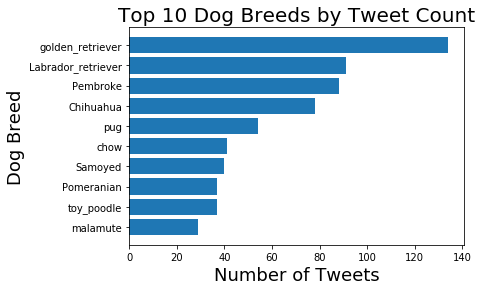

In [258]:
plt.barh(top10_breeds_count.index, top10_breeds_count)

plt.xlabel('Number of Tweets', fontsize = 18)
plt.ylabel('Dog Breed', fontsize = 18)
plt.title('Top 10 Dog Breeds by Tweet Count', fontsize = 20)
plt.gca().invert_yaxis()
plt.show();

##### Answer 1:

As we can see from the graph, the golden retriever is the most posted breed of dog, and this fact can be influenced by several characteristics that this breed has, for example, the golden retriever is considered to be one of the most kid-friendly breeds of dogs, which can clearly influence the number of families that want to take a dog from this breed to live with them, which, in turn, can drive the virtual appearance of this breed up.

##### 2. What is the ten most favorited breeds of dogs? 

In [259]:
# Counting the number of favorite counts that each breed received
grouped = master_df.groupby(by='breed')['favorite_count'].sum()
top_ten_breeds_favorite_count = grouped.sort_values(ascending=False)[:11]
top_ten_breeds_favorite_count

breed
golden_retriever      1663838
Labrador_retriever    1104820
Pembroke              994755 
Chihuahua             673526 
Samoyed               542991 
French_bulldog        465738 
chow                  404241 
pug                   320223 
cocker_spaniel        315825 
Pomeranian            278818 
Cardigan              260287 
Name: favorite_count, dtype: int64

In [260]:
# Getting the mean as an alternative metric
grouped_mean = master_df.groupby(by='breed')['favorite_count'].mean()
grouped_mean.sort_values(ascending=False).head(10)

breed
laptop           55098.0
limousine        46959.0
orange           39467.0
Arabian_camel    38300.0
Angora           37892.5
prison           35669.0
revolver         35553.0
barbell          35325.0
basketball       35324.0
upright          35178.0
Name: favorite_count, dtype: float64

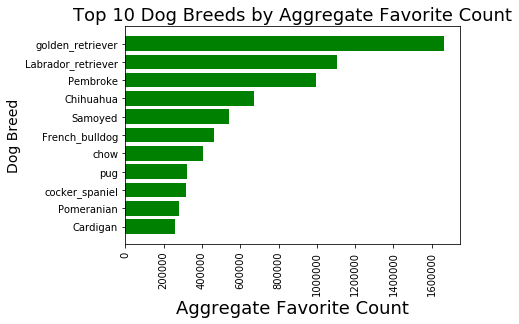

In [261]:
plt.barh(top_ten_breeds_favorite_count.index, top_ten_breeds_favorite_count, color = 'g')

plt.xlabel('Aggregate Favorite Count', fontsize = 18)
plt.ylabel('Dog Breed', fontsize = 14)
plt.title('Top 10 Dog Breeds by Aggregate Favorite Count', fontsize = 18)
plt.gca().invert_yaxis()
plt.xticks(fontsize=10, rotation=90)
plt.show();

##### Answer 2.

As we can see, there were some changes in the breeds from the total number of appearances to the total number of favorited breeds, and we could see that some breeds that did not appear in the total appearances, when we consider the ten most, did appear in the total number of favorite, for example, we could see this happening with the french bulldog, the cocker spaniel, and the cardigan which appeared in the top ten most favorited breeds but did not appear in the top ten most predicted breeds, and this can lead us to think that the average favorited tweets per appearance of these breeds is high.




##### 3. What is the ten most retweeted breeds?

In [262]:
# Getting the number of retweets each breed received.
grouped_retweet = master_df.groupby(by='breed')['retweet_count'].sum()
grouped_retweet.sort_values(ascending=False).head(10)

breed
golden_retriever      489521
Labrador_retriever    359558
Pembroke              280367
Chihuahua             219610
Samoyed               184922
French_bulldog        121782
chow                  116361
cocker_spaniel        100561
Pomeranian            99449 
pug                   99182 
Name: retweet_count, dtype: int64

In [263]:
# Getting the mean as an alternative metric
grouped_retweet = master_df.groupby(by='breed')['retweet_count'].mean()
grouped_retweet.sort_values(ascending=False).head(10)

breed
Arabian_camel     19213.5
upright           18963.0
gondola           16814.0
bubble            16159.0
conch             15071.0
revolver          14740.0
prison            14682.0
remote_control    14409.0
beaver            13517.0
Angora            12983.5
Name: retweet_count, dtype: float64

##### Answer 3.

As expected, the most retweeted breeds of dogs were, again, the golden retriever and the labrador retriever, and we can also see that we have not encountered any major change from the total number of retweets per breed from the total number of favorited tweets per breed.

##### 4. What is the reported stage of dog that receives the best average number of retweets?

In [264]:
# Getting the mean of reetweets for each stage
grouped_retweet = master_df.groupby(by='stage')['retweet_count'].mean()
grouped_retweet.sort_values(ascending=False)

stage
puppo      7027.086957
doggo      6818.267606
floofer    4776.750000
none       2590.190650
pupper     2384.990000
Name: retweet_count, dtype: float64

In [265]:
# Getting the number of times each stage were reported in this DF.
master_df.stage.value_counts()

none       1647
pupper     200 
doggo      71  
puppo      23  
floofer    8   
Name: stage, dtype: int64

##### Answer 4.

As we can see, the stages assigned as puppo and doggo received, on average, the most number of retweets, and if we consider that the doggo stage had almost three times the mention that the puppo stage had, we can see that we would need some more data in order to establish this comparison because although it is statistically significant that puppo had some retweets than doggo, I would bet on doggo to win on the long run.




##### 5. What is the number of tweets that has the rating numerator greater than or equal to 10?

In [266]:
# Percentage of tweets with rating of 10 and up
rating_10up_total = sum(master_df.rating_numerator >= 10)
rating_10up_perc = round(rating_10up_total * 100 / master_df.shape[0])
print("Number of tweets with rating of 10 or more:        {}".format(rating_10up_total))
print("Percentage of tweets represented by this metric:   {}%".format(round(rating_10up_perc, 3)))


Number of tweets with rating of 10 or more:        1542
Percentage of tweets represented by this metric:   79%


##### Answer 5.

As the rating metric is extremely particular, and we need to consider it as it is, I found it interesting to see the total amount and the percentage of tweets that had a numerator greater or equal to ten, since it appears to be the most basic numerator when we think about giving a dog the maximum score possible, and here we can see that 79% of tweets had a numerator score of 10 or more, which we can conclude that, almost every dog that appeared here are really really cute.


##### 6. What is the number and percentage of tweets that has a stage?

In [267]:
# The number of tweets that has a stage:
with_stage = sum(master_df.stage != 'none')
tweets_with_stage = round(with_stage * 100 / master_df.shape[0])
print("Number of tweets WITH stage:                      {}".format(with_stage))
print("Percentage of tweets represented by this metric:  {}%".format(round(tweets_with_stage, 3)))


Number of tweets WITH stage:                      302
Percentage of tweets represented by this metric:  15%


##### Answer 6.

Here we can see that, if we were to go back into the wrangling process, we would need to consider how to get more tweets that have a reported stage if we want to consider the stage as a metric for some comparison because just by looking at the data we have, we can see that only 15% of the tweets have a reported stage, and this can lead any analysis to become not representative of the population.
